### 問題１

Home Creditはどのような企業？

回答＿その顧客が返済能力があるかどうかを予測する。

このコンペティションでは何を予測する？

回答＿返済能力を予測する。

それを予測することで企業が得られるメリットは何？

返済予測のデータセットを得ることができる。
銀行、顧客双方にメリットを与えることができる。

In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("application_train.csv")
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [5]:
df.shape

(307511, 122)

### 【問題2】データの概観の把握 
データの概観を把握するために以下のようなことを行ってください。
.head()、.info()、describe()などを使う
欠損値の有無を見る
クラスごとのデータ数をグラフに出す
それぞれ結果に対する説明や考察も行ってください。

In [6]:
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

              ...              FLAG_DOCUMENT_18 FLAG_DOCUMENT_19  \
0             ...                             0                0   
1             ...                             0                0   
2             ...                             0                0   
3             ...                             0                0   
4             ...                             0                0   

  FLAG_DOCUMENT_20 FLAG_DOCUMENT_21 AMT_REQ_CREDIT_BUREAU_HOUR  \
0                0                0                        0.0   
1                0                0                        0.0   
2                0                0                        0.0   
3                0                0                        NaN   
4                0                0                        0.0   

  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       NaN                         NaN   
4                       0.0                         0.0   

   AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_YEAR  
0                         1.0  
1                         0.0  
2                         0.0  
3                         NaN  
4                         0.0  

[5 rows x 122 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

                  ...              FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count             ...                 307511.000000     307511.000000   
mean              ...                      0.008130          0.000595   
std               ...                      0.089798          0.024387   
min               ...                      0.000000          0.000000   
25%               ...                      0.000000          0.000000   
50%               ...                      0.000000          0.000000   
75%               ...                      0.000000          0.000000   
max               ...                      1.000000          1.000000   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count     307511.000000     307511.000000               265992.000000   
mean           0.000507          0.000335                    0.006402   
std            0.022518          0.018299                    0.083849   
min            0.000000          0.000000                    0.000000   
25%            0.000000          0.000000                    0.000000   
50%            0.000000          0.000000                    0.000000   
75%            0.000000          0.000000                    0.000000   
max            1.000000          1.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              265992.000000              265992.000000   
mean                    0.267395                   0.265474   
std                     0.916002                   0.794056   
min                     0.000000                   0.000000   
25%                     0.000000                   0.

考察　＿収入は平均1700万。借金は平均6000万。日本での感覚的には年収170万円で借金600万円と考えると、やっぱり苦しい状態だとわかる。

In [9]:
df.isnull().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

考察＿　OCCUPATION_TYPEは仕事の種類を聞いているが、欠損が多いので、無職のため、空白にしているのでは？

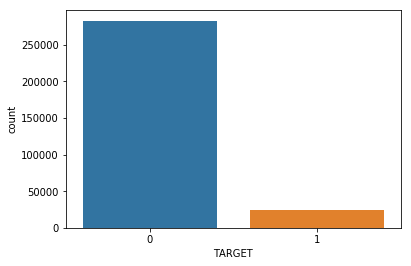

In [153]:
sns.countplot(x="TARGET", data=df)

考察＿　借金を返せた人の割合は少ない。

### 【問題3】課題設定 
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

課題＿借金を返せた人、返せなかった人の目的変数に対して、どの特徴量が効いているのか調査する。
疑問＿借金が多い人は、傾向にあるのか？

### 【問題4】データ探索 
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。考察を伴う表やグラフを 15個以上 作成してください。
探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

In [160]:
df_target1_corr = df[df["TARGET"]==1].corr()
df_target1_corr.head()

SK_ID_CURR  TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR          1.000000     NaN     -0.005144         -0.010165   
TARGET                   NaN     NaN           NaN               NaN   
CNT_CHILDREN       -0.005144     NaN      1.000000          0.004796   
AMT_INCOME_TOTAL   -0.010165     NaN      0.004796          1.000000   
AMT_CREDIT         -0.001290     NaN     -0.001675          0.038131   

                  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
SK_ID_CURR         -0.001290    -0.007578        -0.001816   
TARGET                   NaN          NaN              NaN   
CNT_CHILDREN       -0.001675     0.031257        -0.008112   
AMT_INCOME_TOTAL    0.038131     0.046421         0.037583   
AMT_CREDIT          1.000000     0.752195         0.983103   

                  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
SK_ID_CURR                          0.006301   -0.001254      -0.005151   
TARGET                                   NaN         NaN            NaN   
CNT_CHILDREN                       -0.031975    0.259109      -0.191942   
AMT_INCOME_TOTAL                    0.009135    0.003096      -0.014979   
AMT_CREDIT                          0.069161   -0.135316      -0.000968   

                             ...              FLAG_DOCUMENT_18  \
SK_ID_CURR                   ...                     -0.009181   
TARGET                       ...                           NaN   
CNT_CHILDREN                 ...                      0.004333   
AMT_INCOME_TOTAL             ...                     -0.002177   
AMT_CREDIT                   ...                      0.011174   

                  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  \
SK_ID_CURR               -0.006382          0.003781          0.006932   
TARGET                         NaN               NaN               NaN   
CNT_CHILDREN             -0.001370         -0.002395          0.001136   
AMT_INCOME_TOTAL         -0.000371         -0.000450         -0.000647   
AMT_CREDIT                0.013442          0.016949         -0.021964   

                  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
SK_ID_CURR                         -0.012036                  -0.007954   
TARGET                                   NaN                        NaN   
CNT_CHILDREN                       -0.000382                  -0.013004   
AMT_INCOME_TOTAL                    0.000656                  -0.000272   
AMT_CREDIT                         -0.005981                   0.003008   

                  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
SK_ID_CURR                         -0.002999                   0.006436   
TARGET                                   NaN                        NaN   
CNT_CHILDREN                       -0.011792                  -0.012583   
AMT_INCOME_TOTAL                    0.000018                   0.004114   
AMT_CREDIT                          0.007650                   0.055038   

                  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
SK_ID_CURR                        -0.000880                    0.008916  
TARGET                                  NaN                         NaN  
CNT_CHILDREN                      -0.018174                   -0.035427  
AMT_INCOME_TOTAL                  -0.001133                    0.001752  
AMT_CREDIT                        -0.017467                   -0.035719  

[5 rows x 106 columns]

In [154]:
#TARGETに対して影響のある特徴量調査のため、相関係数上位10個抽出
df_corr=df.corr()
df_corr_target  = df_corr["TARGET"].sort_values(ascending=False)
print(df_corr_target[1:11])

DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
Name: TARGET, dtype: float64


In [155]:
#同様に、下位10個抽出　(負の相関が大きい特徴量抽出)
print(df_corr_target[-11:-1])

ELEVATORS_MEDI               -0.033863
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
Name: TARGET, dtype: float64


In [159]:
#TARGETに対して影響のある特徴量とTARGETのデータフレーム作成。
a=df_corr_target[1:11].index
b=df_corr_target[-11:-1].index

df_concat = pd.concat([df[a], df[b]],axis=1)

df_concat_t=pd.concat([df_concat,df["TARGET"]],axis=1)

display(df_concat_t.shape)
df_concat_t.head(10)

(307511, 21)

DAYS_BIRTH  REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT  \
0       -9461                            2                     2   
1      -16765                            1                     1   
2      -19046                            2                     2   
3      -19005                            2                     2   
4      -19932                            2                     2   
5      -16941                            2                     2   
6      -13778                            2                     2   
7      -18850                            3                     3   
8      -20099                            2                     2   
9      -14469                            2                     2   

   DAYS_LAST_PHONE_CHANGE  DAYS_ID_PUBLISH  REG_CITY_NOT_WORK_CITY  \
0                 -1134.0            -2120                       0   
1                  -828.0             -291                       0   
2                  -815.0            -2531                       0   
3                  -617.0            -2437                       0   
4                 -1106.0            -3458                       1   
5                 -2536.0             -477                       0   
6                 -1562.0             -619                       0   
7                 -1070.0            -2379                       1   
8                     0.0            -3514                       0   
9                 -1673.0            -3992                       0   

   FLAG_EMP_PHONE  REG_CITY_NOT_LIVE_CITY  FLAG_DOCUMENT_3  DAYS_REGISTRATION  \
0               1                       0                1            -3648.0   
1               1                       0                1            -1186.0   
2               1                       0                0            -4260.0   
3               1                       0                1            -9833.0   
4               1                       0                0            -4311.0   
5               1                       0                1            -4970.0   
6               1                       0                0            -1213.0   
7               1                       0                1            -4597.0   
8               0                       0                1            -7427.0   
9               1                       0                0           -14437.0   

    ...    ELEVATORS_AVG  REGION_POPULATION_RELATIVE  AMT_GOODS_PRICE  \
0   ...             0.00                    0.018801         351000.0   
1   ...             0.08                    0.003541        1129500.0   
2   ...              NaN                    0.010032         135000.0   
3   ...              NaN                    0.008019         297000.0   
4   ...              NaN                    0.028663         513000.0   
5   ...              NaN                    0.035792         454500.0   
6   ...              NaN                    0.035792        1395000.0   
7   ...              NaN                    0.003122        1530000.0   
8   ...              NaN                    0.018634         913500.0   
9   ...              NaN                    0.019689         405000.0   

   FLOORSMAX_MODE  FLOORSMAX_MEDI  FLOORSMAX_AVG  DAYS_EMPLOYED  EXT_SOURCE_1  \
0          0.0833          0.0833         0.0833           -637      0.083037   
1          0.2917          0.2917         0.2917          -1188      0.311267   
2             NaN             NaN            NaN           -225           NaN   
3             NaN             NaN            NaN          -3039           NaN   
4             NaN             NaN            NaN          -3038           NaN   
5             NaN             NaN            NaN          -1588           NaN   
6             NaN             NaN            NaN          -3130      0.774761   
7             NaN             NaN            NaN           -449           NaN   
8             NaN             NaN            NaN         3

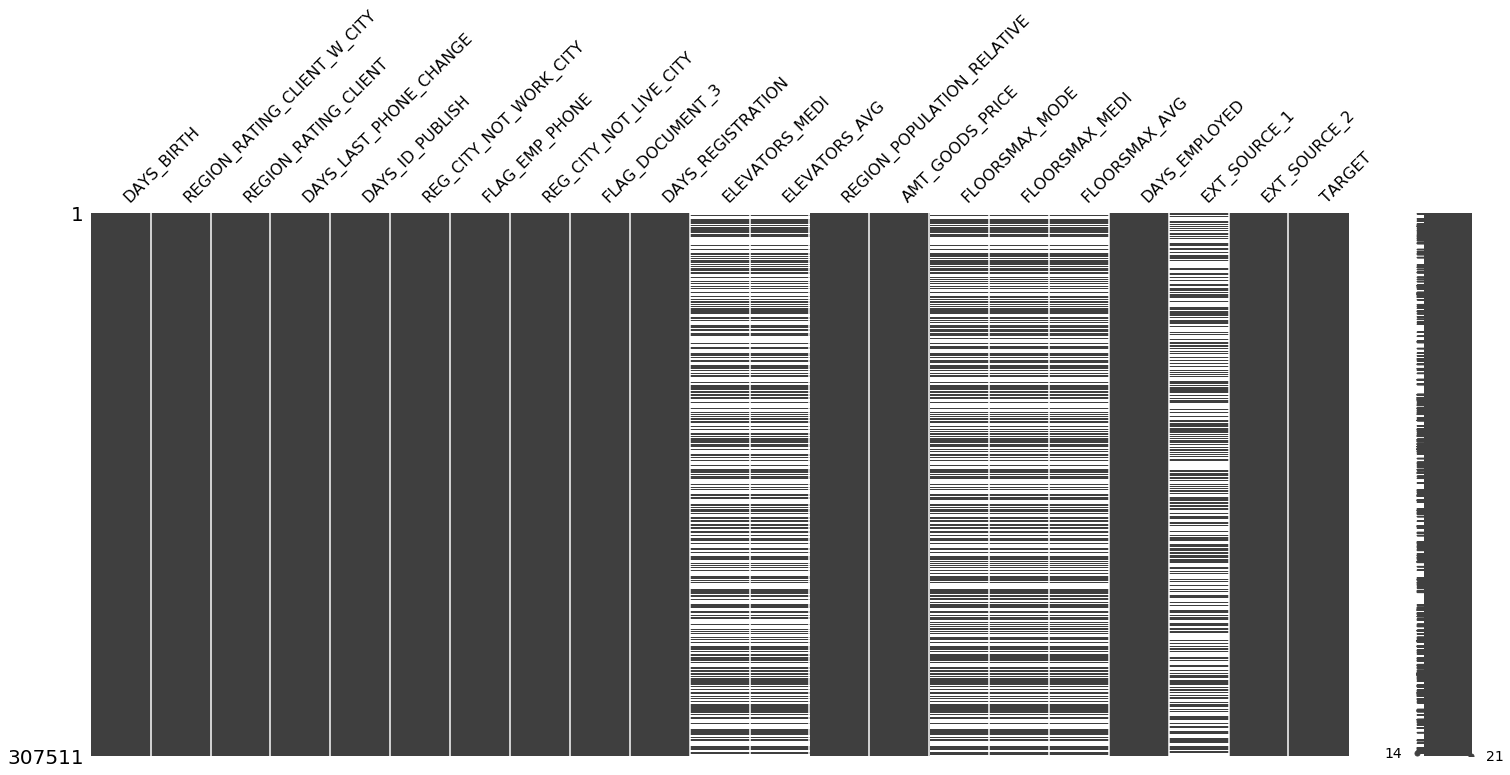

In [91]:
#作成したデータフレームの欠損確認。
import missingno as msno
msno.matrix(df_concat_t)

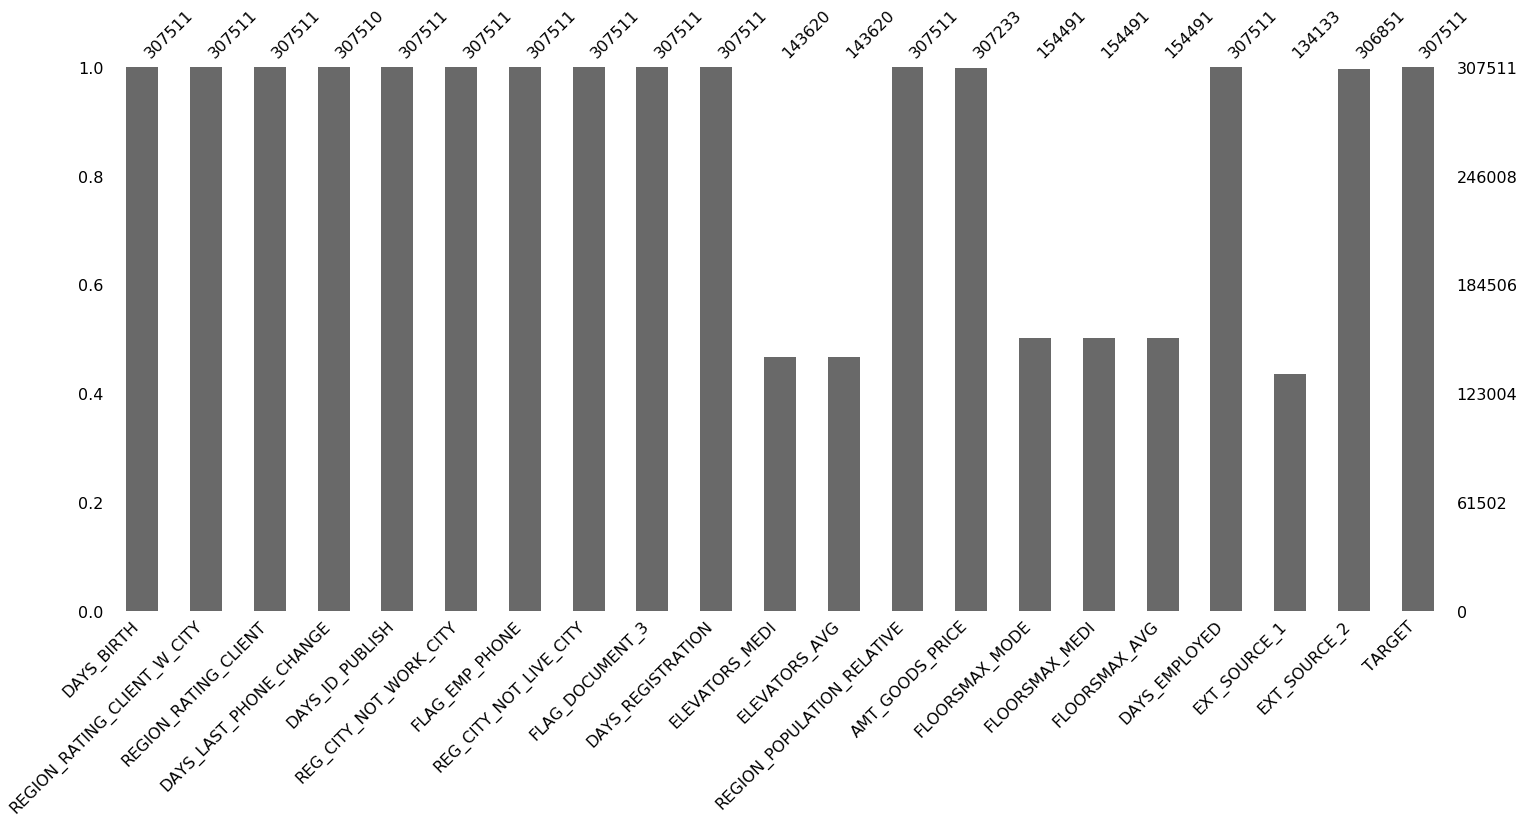

In [86]:
#作成したデータフレームの欠損確認２。
msno.bar(df_concat_t)

In [144]:
#作成したデータフレームの欠損を削除。
df_concat_t_dropna = df_concat_t.dropna()
display(df_concat_t_dropna.shape)
display(df_concat_t_dropna.query("TARGET==1").shape)
display(df_concat_t_dropna.isnull().sum())

(65248, 21)

(4227, 21)

DAYS_BIRTH                     0
REGION_RATING_CLIENT_W_CITY    0
REGION_RATING_CLIENT           0
DAYS_LAST_PHONE_CHANGE         0
DAYS_ID_PUBLISH                0
REG_CITY_NOT_WORK_CITY         0
FLAG_EMP_PHONE                 0
REG_CITY_NOT_LIVE_CITY         0
FLAG_DOCUMENT_3                0
DAYS_REGISTRATION              0
ELEVATORS_MEDI                 0
ELEVATORS_AVG                  0
REGION_POPULATION_RELATIVE     0
AMT_GOODS_PRICE                0
FLOORSMAX_MODE                 0
FLOORSMAX_MEDI                 0
FLOORSMAX_AVG                  0
DAYS_EMPLOYED                  0
EXT_SOURCE_1                   0
EXT_SOURCE_2                   0
TARGET                         0
dtype: int64

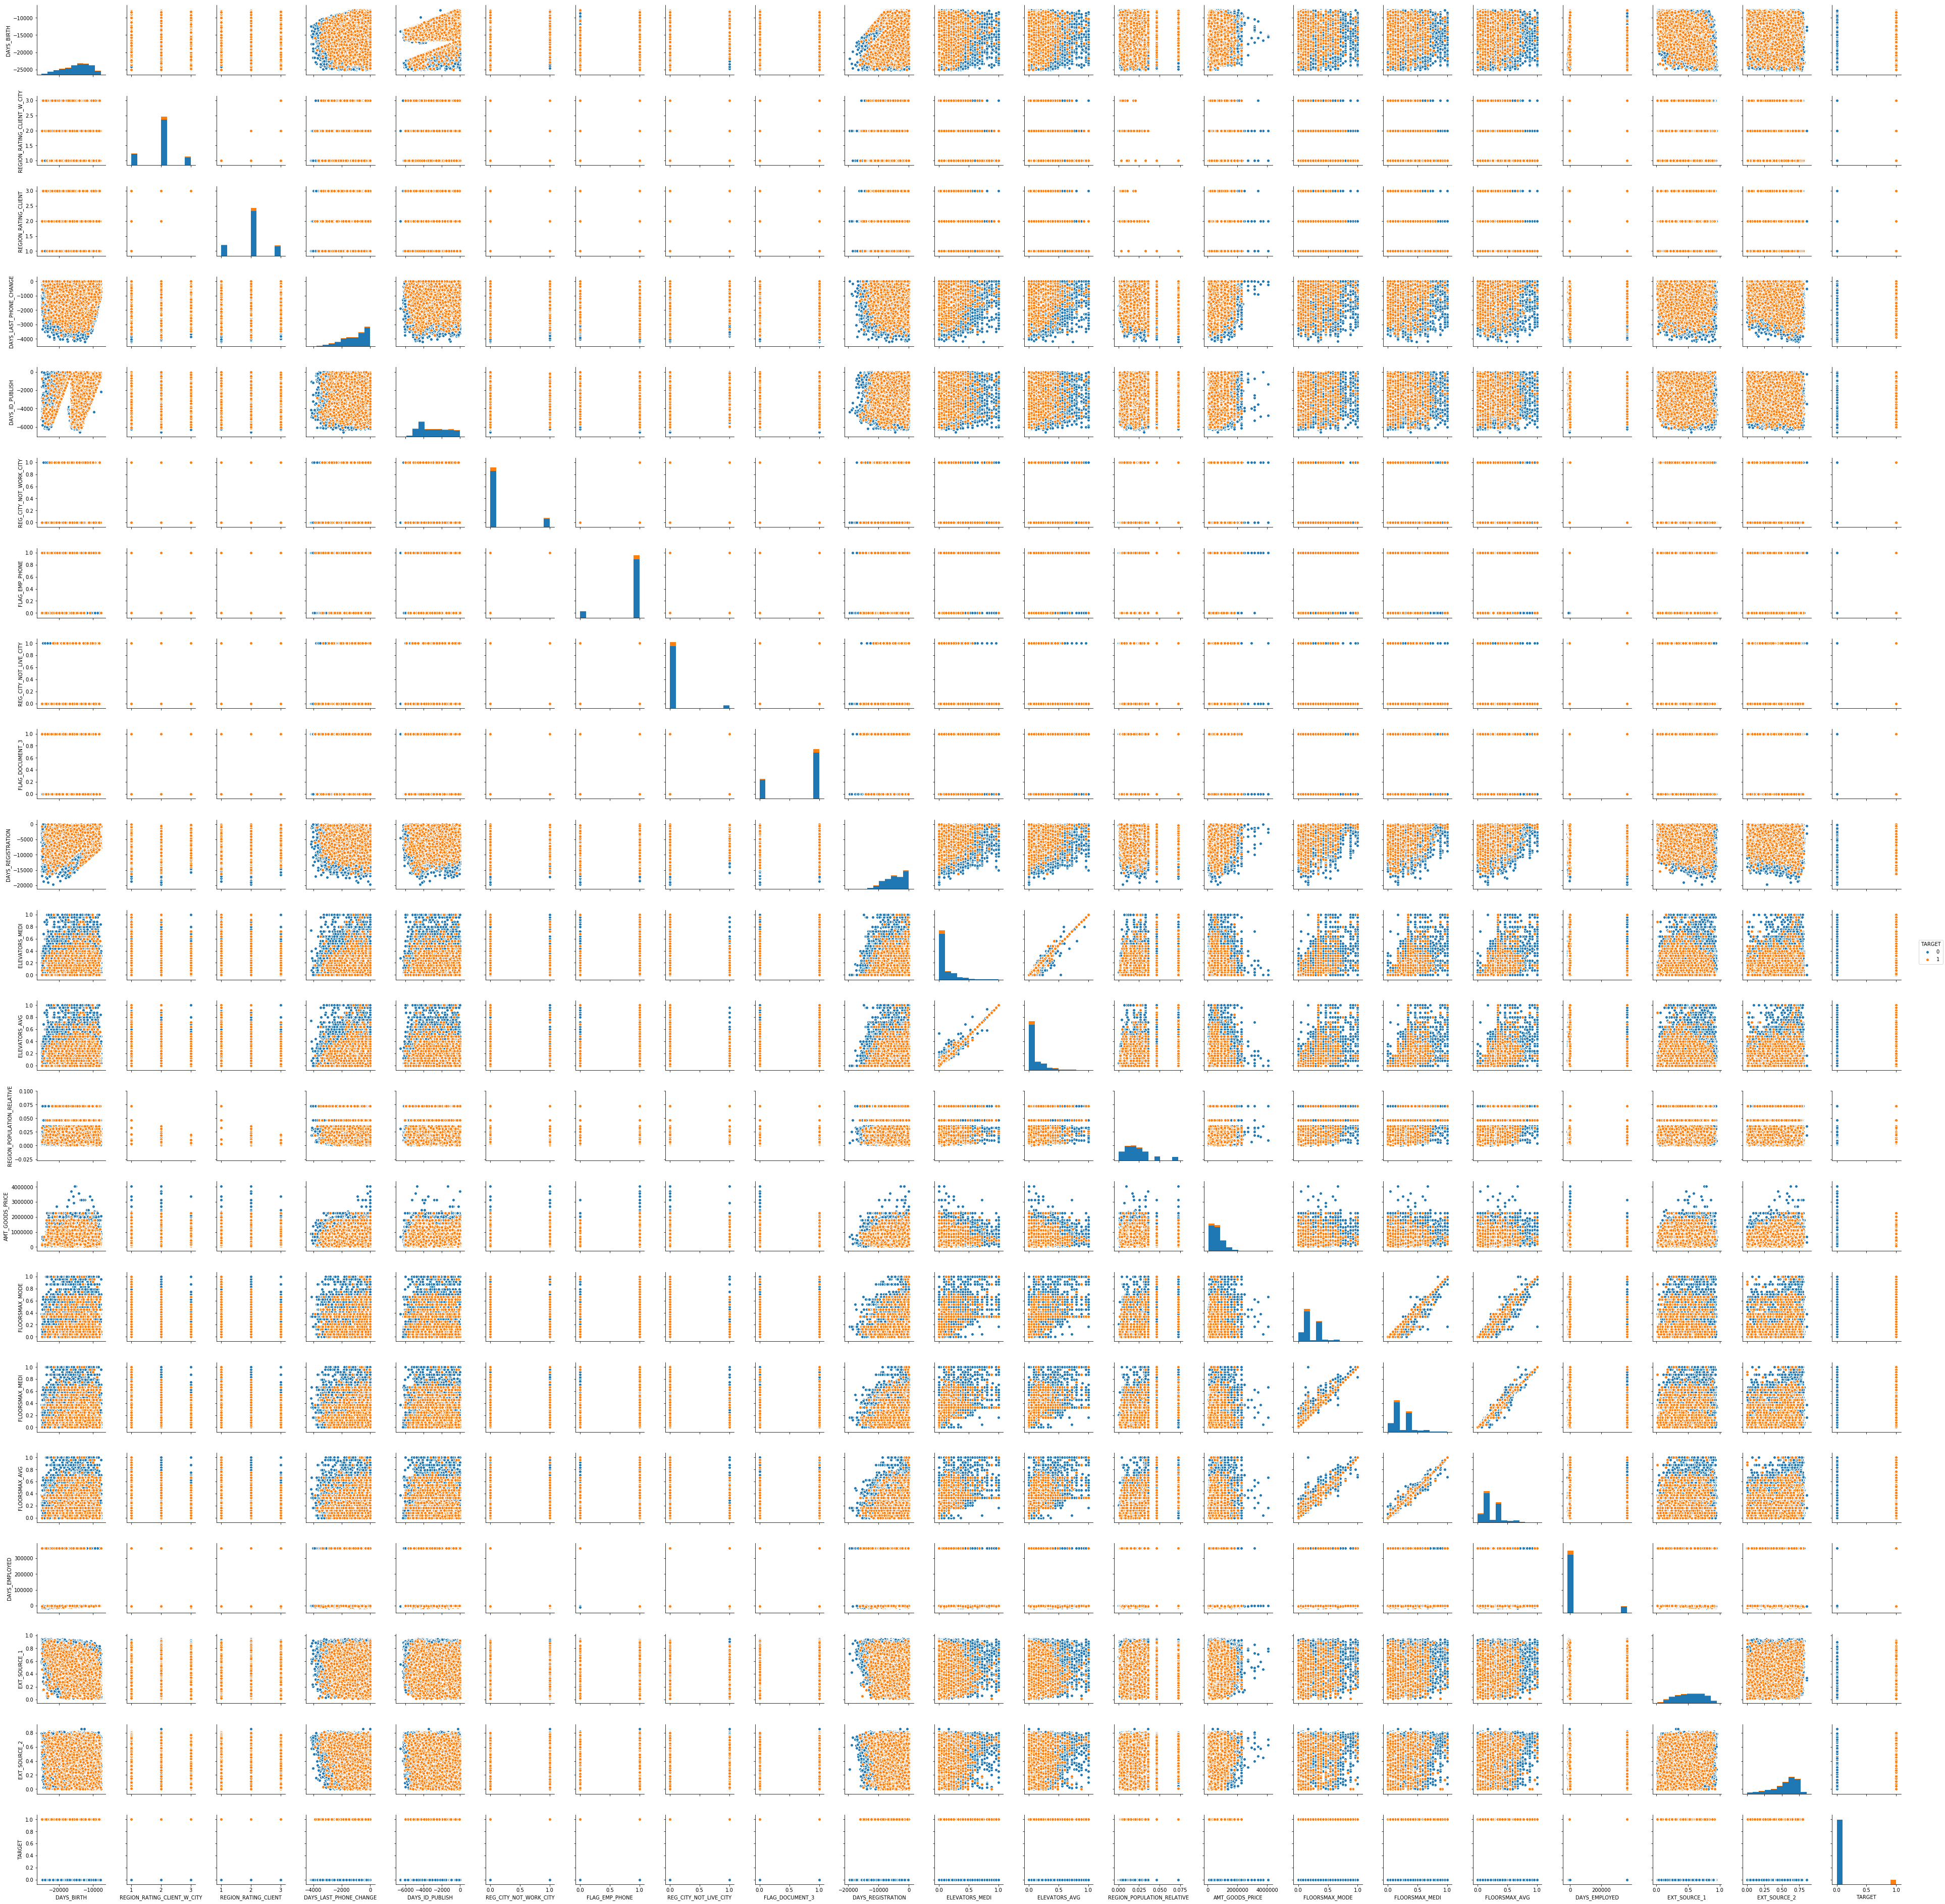

In [103]:
#作成したデータフレームにて総当たりで相関グラフ確認
import seaborn as sns
sns.pairplot(df_concat_t_dropna, hue="TARGET")
#結果TARGETに対しての関係性を見たかったが、よくわからず。

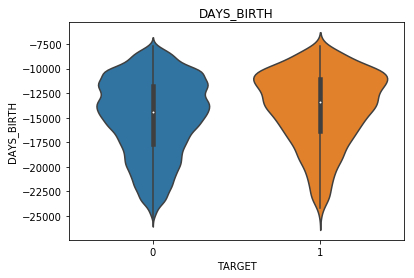

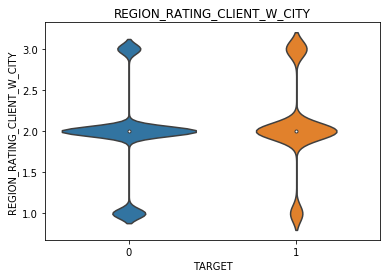

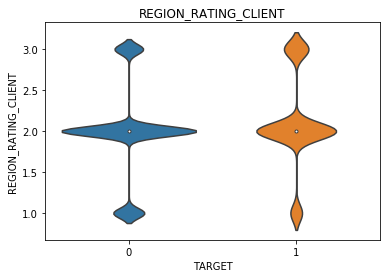

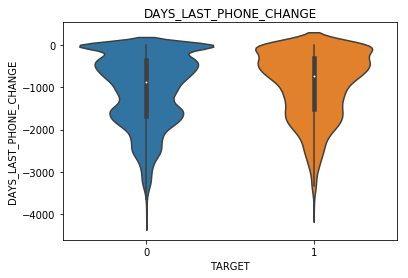

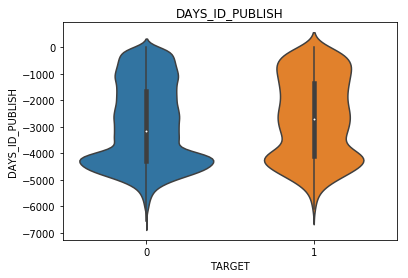

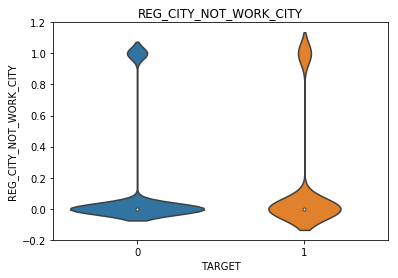

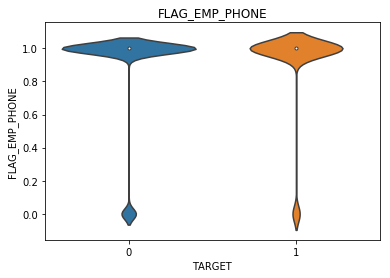

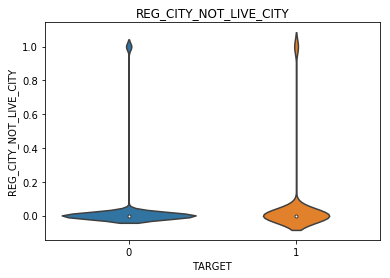

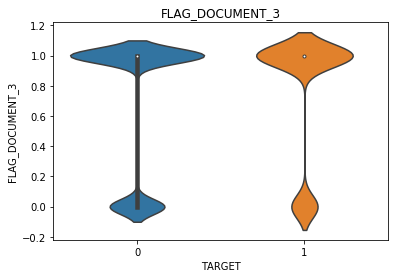

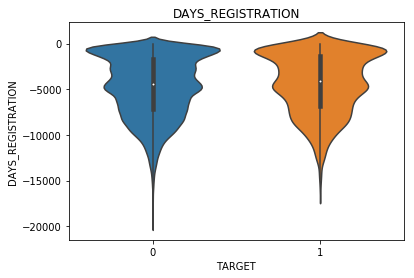

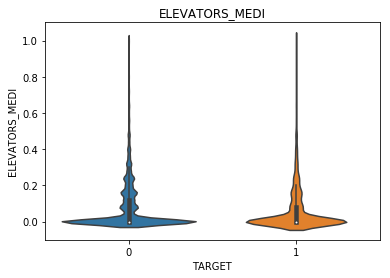

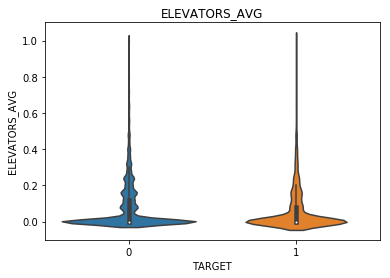

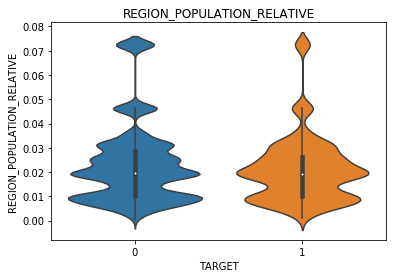

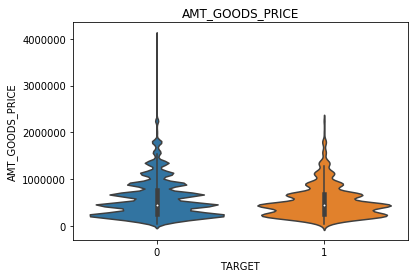

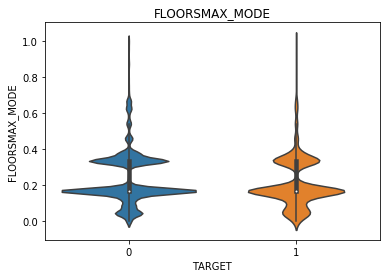

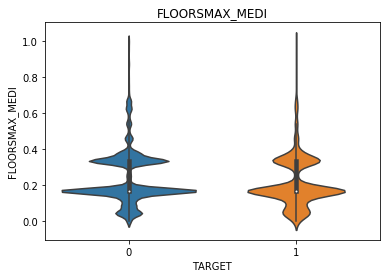

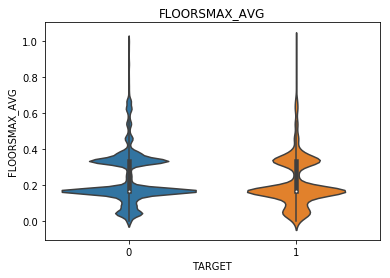

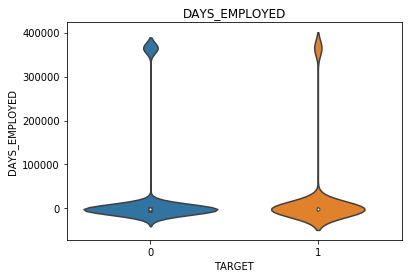

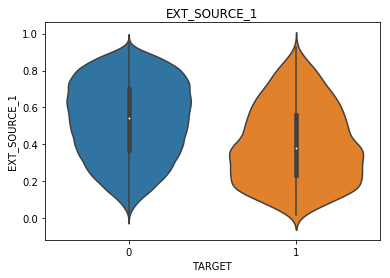

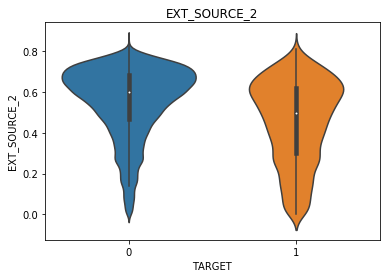

考察＿EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTHでTARGETの傾向が異なるので、
　　　　課題の回答として、この3項目が借金を返せた人、返せなかった人の目的変数に対して、影響が大きいと考える。


In [162]:
#作成したデータフレームにて全特徴量でバイオリン図を作成し、TARGET0,1の分布を比較。
features = df_concat_t_dropna.columns[:-1]
for feature in features:
    sns.violinplot(x="TARGET",y=feature, data=df_concat_t_dropna, split=True)
    plt.title(feature)
    plt.show()
print("考察＿EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTHでTARGETの傾向が異なるので、\n　　　　課題の回答として、この3項目が借金を返せた人、返せなかった人の目的変数に対して、影響が大きいと考える。")

In [170]:
#借金が多い人は、どんな特徴量が効いているのか、まずは相関係数が強い項目を確認
df_corr_credit  = df_corr["AMT_CREDIT"].sort_values(ascending=False)
print(df_corr_credit[1:11])
print(df_corr_credit[-11:-1])

print("疑問点の借金が多い人は、ほとんど消費者ローンで借りていて、他にローン年金が多い。")

AMT_GOODS_PRICE               0.986968
AMT_ANNUITY                   0.770138
EXT_SOURCE_1                  0.168429
AMT_INCOME_TOTAL              0.156870
EXT_SOURCE_2                  0.131228
FLOORSMAX_AVG                 0.103296
FLOORSMAX_MEDI                0.102770
FLOORSMAX_MODE                0.100418
REGION_POPULATION_RELATIVE    0.099738
FLAG_DOCUMENT_3               0.096365
Name: AMT_CREDIT, dtype: float64
DEF_60_CNT_SOCIAL_CIRCLE     -0.023767
REG_CITY_NOT_LIVE_CITY       -0.026886
TARGET                       -0.030369
FLAG_DOCUMENT_6              -0.046717
AMT_REQ_CREDIT_BUREAU_YEAR   -0.048448
DAYS_BIRTH                   -0.055436
DAYS_EMPLOYED                -0.066838
DAYS_LAST_PHONE_CHANGE       -0.073701
OWN_CAR_AGE                  -0.094191
REGION_RATING_CLIENT         -0.101776
Name: AMT_CREDIT, dtype: float64
疑問点の借金が多い人は、ほとんど消費者ローンで借りていて、他にローン年金が多い。


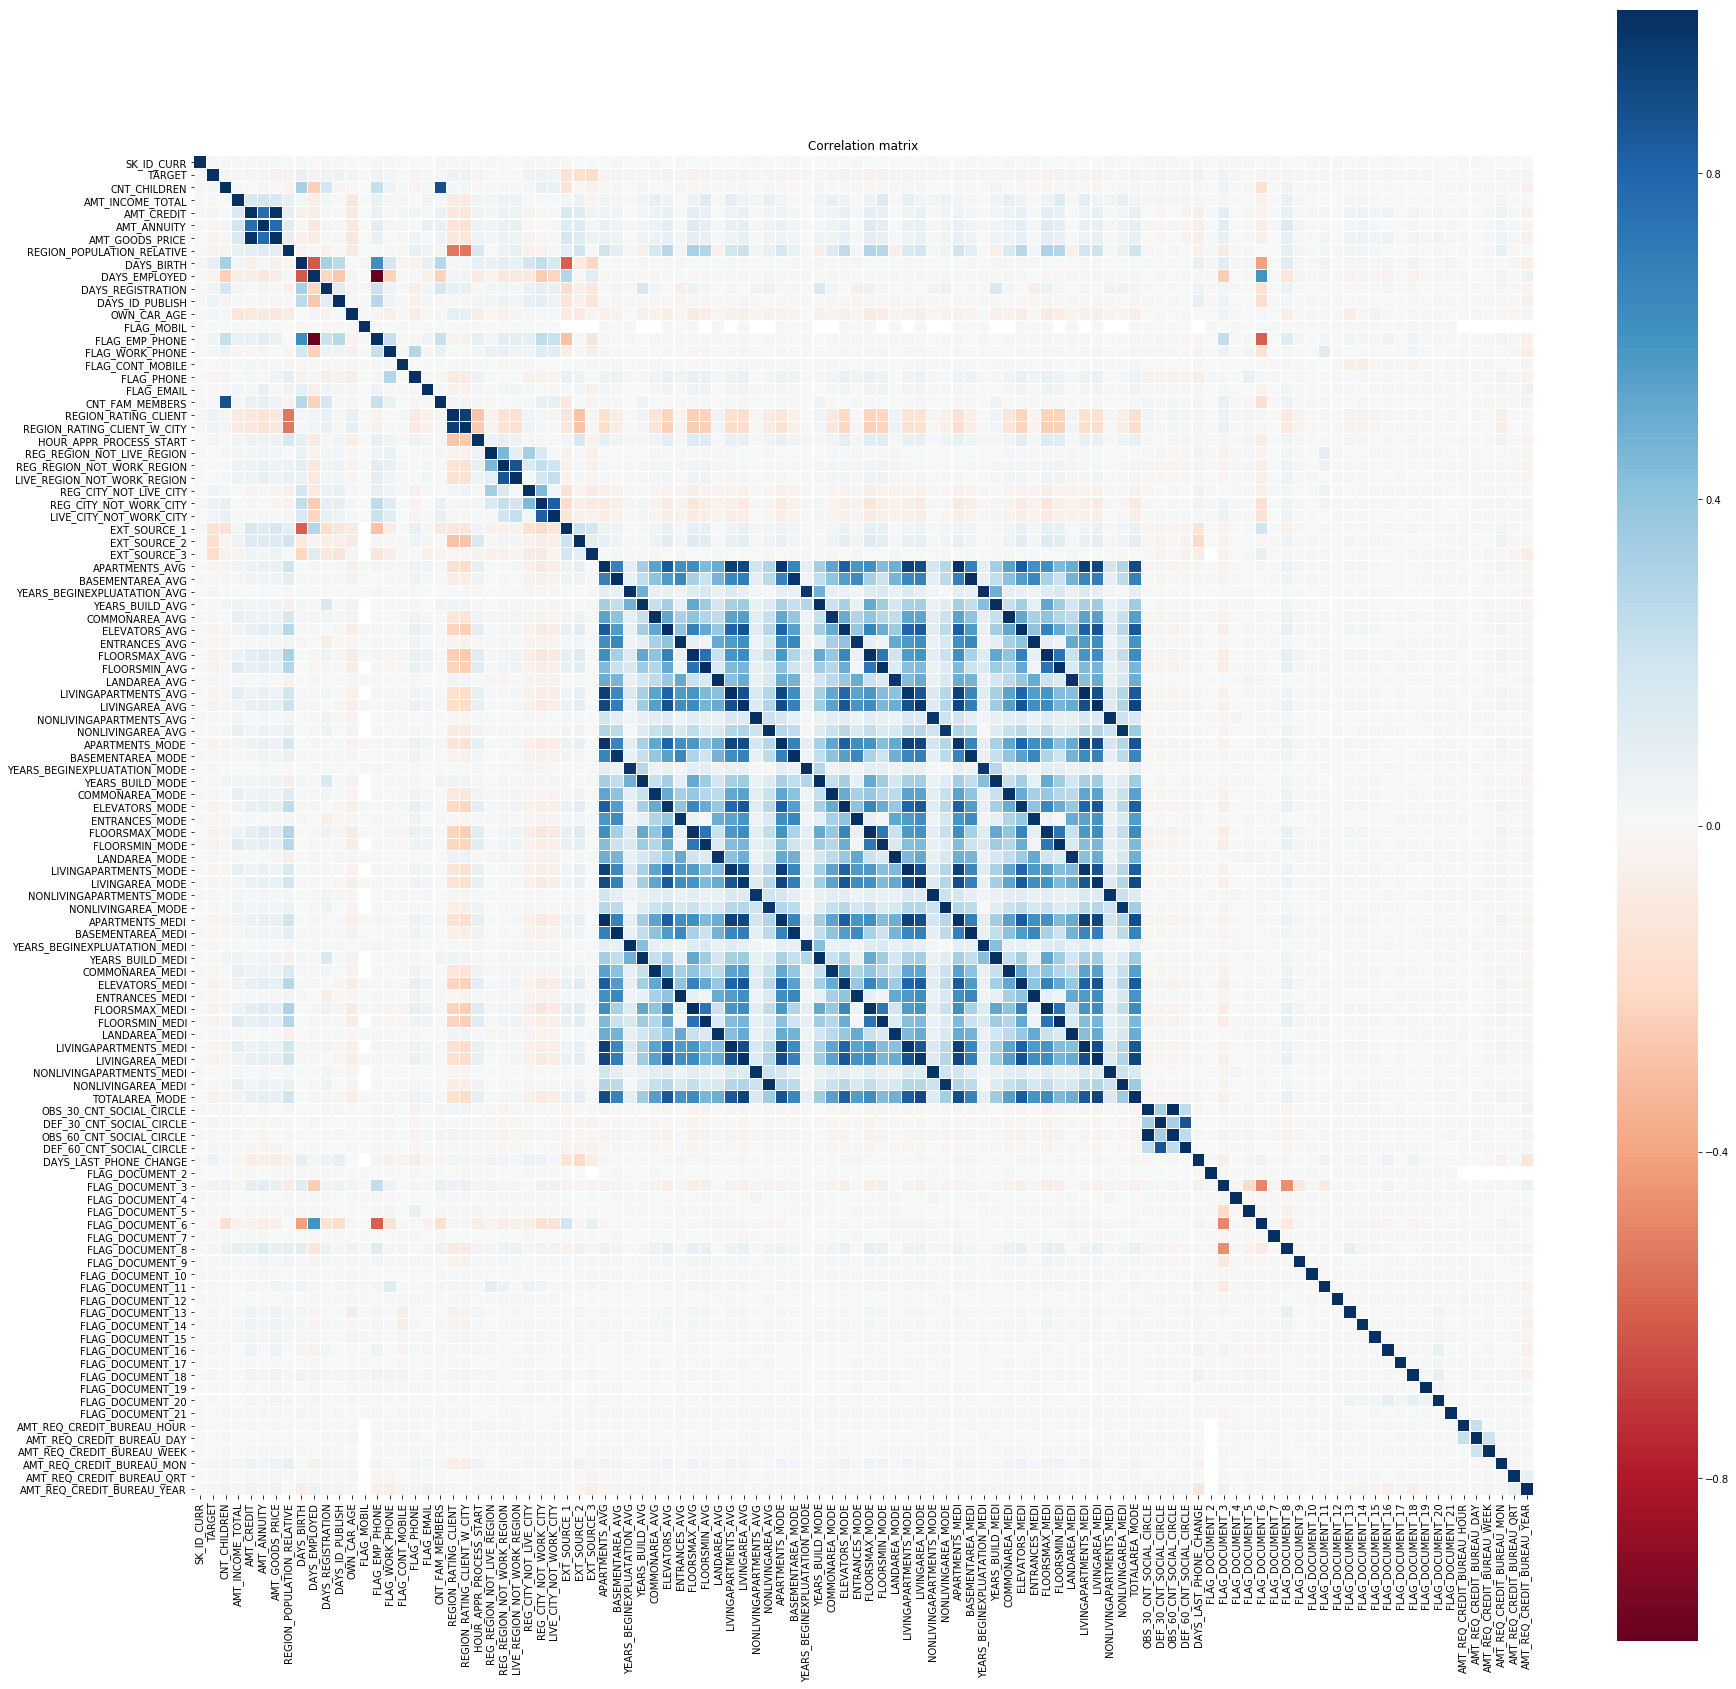

(106, 106)

In [167]:
#全データの相関系数を出してみた。
df_corr = df.corr()

colormap = plt.cm.RdBu
plt.subplots(figsize=(30, 30))
plt.title('Correlation matrix')
sns.heatmap(df_corr, linewidths=0.1, square=True, cmap=colormap, linecolor='white', annot=False)
plt.show()
df_corr.shape 